<a href="https://colab.research.google.com/github/Mgobeaalcoba/proyectos_platzi/blob/main/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7. Regresión lineal

Usaremos la función afín:

$$
\hat{y} = \mathbf{x}^{T}\boldsymbol{\beta} + v
$$

Esta función es llamada un **modelo de regresión**. En este caso las entradas de $\mathbf{x}$ son llamadas *regresores* y a $\hat{y}$ se le llama *predicción*. Hay que notar que la regresión es un modelo, nos estamos aproximando a estimar nuestra variable dependiente $y$, algunas veces llamada también *label*, *etiqueta* o *resultado esperado*. 

Al vector $\mathbf{\beta}$ se le denomina el *vector de pesos* mientras que el escalar $v$ es llamado el offset o bias. En conjunto $v$ y $\beta$ son los parámetros de la regresión. Recordamos que la notación $\hat{y}$ es usando para enfatizar que es un estimado o prediccción del resultado esperado $y$. 

## 7.1 Notación simplificada de un modelo de regresión. 

La concatenación de vectores nos puede ayudar a expresar de manera más sencilla la ecuación de regresión. Notemos que podemos definir el $(n+1)$-vector $\boldsymbol{\tilde{\beta}}^{T} = [v\; \boldsymbol{\beta}]$ y de igual forma el $(n+1)$-vector $\mathbf{\widetilde{x}}^{T} = [1 \; \boldsymbol{x}]$ de manera que:

$$
\hat{y} = \mathbf{x}^{T}\boldsymbol{\beta} + v = \begin{bmatrix}1\\ \mathbf{x}\end{bmatrix}^{T} \begin{bmatrix} v\\\boldsymbol{\beta}  \end{bmatrix} = \mathbf{\widetilde{x}}^{T} \boldsymbol{\widetilde{\beta}}
$$

Por simplicidad algunas veces solamente se escribe $\hat{y}=\mathbf{x}^{T}\boldsymbol{\beta}$ sobreentendiendo nuestra construcción. 

## 7.2 Un ejemplo de regresión. 

Vamos a considerar el siguiente ejemplo donde vamos a analizar una base de datos del *GOLDEN OAK RESEARCH GROUP*. Nuestra variable dependiente serán el ingreso promedio por casa y nuestros regresores serán simplemente la latitud y la longitud. 

Para poder cargar la base vamos a importar en conjunto a numpy también **pandas** la cual es una biblioteca de manejo y manipulación de bases de datos tomando como bases sus objetos *dataframe*. 

In [1]:
import matplotlib.pyplot as plt # Para poder realizar visualizaciones
import pandas as pd # Para poder acceder a pandas
import numpy as np # Para poder tener vectores

In [3]:
df = pd.read_csv('income_db_gorg.csv')

In [4]:
df.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [5]:
df.tail()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
32521,720296,72,Puerto Rico,PR,Adjuntas Municipio,Guaynabo,Adjuntas,Track,Track,970,787,589417,1691,18.397925,-66.130633,30649,13729,37977,1321.278082
32522,7202966,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,1801613,795887,18.385424,-67.203310,15520,9923,15541,238.813450
32523,7202976,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,11031227,0,18.356565,-67.180686,41933,34054,31539,313.551070
32524,7202986,72,Puerto Rico,PR,Adjuntas Municipio,Aguada,Adjuntas,Track,Track,602,787,0,33597561,18.412041,-67.213413,0,0,0,0.000000
32525,7202996,72,Puerto Rico,PR,Adjuntas Municipio,Aguadilla,Adjuntas,Track,Track,603,787,6476604,2717115,18.478094,-67.160453,28049,20229,33333,512.884803


¿Qué data contiene la base de datos?

¿Qué tamaño tiene?

In [7]:
len(df)*len(df.columns)

617994

In [8]:
len(df)

32526

In [10]:
len(df.columns)

19

In [9]:
df.columns

Index(['id', 'State_Code', 'State_Name', 'State_ab', 'County', 'City', 'Place',
       'Type', 'Primary', 'Zip_Code', 'Area_Code', 'ALand', 'AWater', 'Lat',
       'Lon', 'Mean', 'Median', 'Stdev', 'sum_w'],
      dtype='object')

Cada columna la podemos trabajar como un vector

Ahora bien, como comenté nuestros regresores en términos de columnas son:
* Lat
* Lon

Mientras que nuestra variable dependiente es:
* Mean 

Ahora, calcular el vector predicciones $\hat{y}$ ya que cada valor de Lat y Lon tendrá asociado un valor de Mean y es justo el que queremos aproximar con $\hat{y}$. Ahora, como no forma parte de este curso ya tenemos unos parámetros dados:

$$
v = 30980.48, \qquad \boldsymbol{\beta} = \begin{bmatrix}744.83 \\ -83.45\end{bmatrix}
$$

Con lo cual ya podemos realizar las predicciones $\hat{y}_{i} = \mathbf{x}^{T}_{i} \boldsymbol{\beta} + v$

In [11]:
def pred(x):
    beta = np.array([744.83,-83.45])
    v = 30980.48
    return x@beta + v

In [12]:
type(df['Lat'])

pandas.core.series.Series

Transformo el tipo series de pandas en un numpy arrays mediante el metodo ".values"

In [13]:
type(df['Lat'].values)

numpy.ndarray

Necesito pasar como X un vector que tenga un dato de latitud y un dato de longitud. Por eso es que debo armarlo de la siguiente manera

In [15]:
df[["Lat","Lon"]]

,Lat,Lon
0,30.771450,-88.079697
1,31.708516,-85.611039
2,33.191452,-86.615618
3,30.874343,-88.009442
4,30.250913,-88.171268
...,...,...
32521,18.397925,-66.130633
32522,18.385424,-67.203310
32523,18.356565,-67.180686
32524,18.412041,-67.213413


In [16]:
type(df[["Lat","Lon"]]) # Veo que es un data frame completo

pandas.core.frame.DataFrame

No me sirve. Debo transformarlo en un array de numpy

In [17]:
df[['Lat','Lon']].values

array([[ 30.77145  , -88.079697 ],
       [ 31.708516 , -85.611039 ],
       [ 33.191452 , -86.615618 ],
       ...,
       [ 18.3565654, -67.180686 ],
       [ 18.4120413, -67.2134127],
       [ 18.4780938, -67.1604529]])

In [18]:
type(df[['Lat','Lon']].values)

numpy.ndarray

Perfecto. Entonces voy a guardar el vector armado en un variable X

In [19]:
X = df[['Lat','Lon']].values

In [27]:
Y_hat = pred(X) # hat de "ye gorrito" en ingles
Y_hat

array([61250.22981815, 61742.17517683, 62930.54251526, ...,
       50259.22885358, 50303.28001129, 50348.05839956])

In [31]:
type(Y_hat)

numpy.ndarray

In [23]:
len(Y_hat)

32526

In [24]:
len(X)

32526

Se corresponden 1 a 1 X y Y_hat

In [25]:
Y = df['Mean'].values
Y

array([38773, 37725, 54606, ..., 41933,     0, 28049])

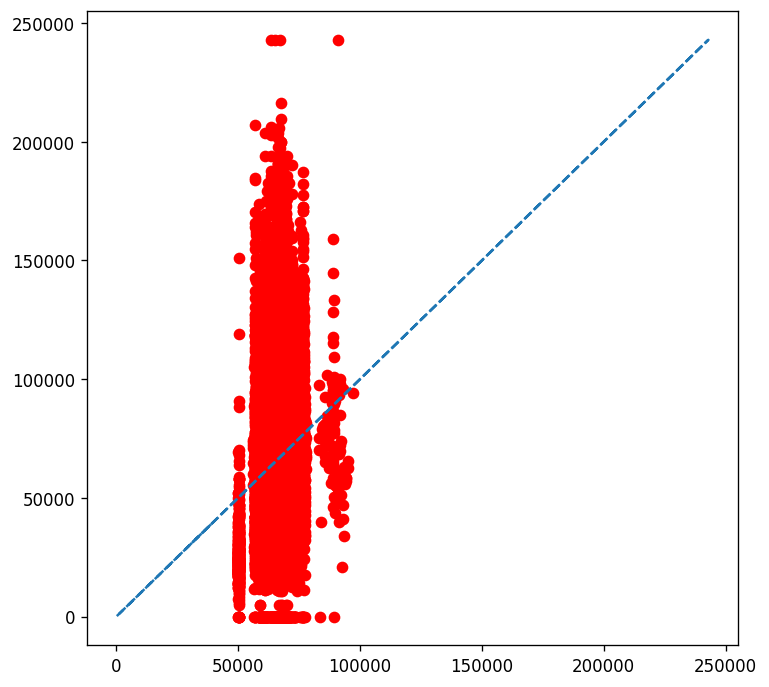

In [28]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(Y_hat,Y,marker ='o',color='red')
ax.plot(Y,Y,ls='--') # Y, Y es el mejor de los escenarios. Los puntos deberían estar cerca de la recta
# Como no sucede entonces debemos reentrenar el modelo. 
plt.show()

¿Cómo calculamos el error?

## 7.3 Ejercicio. 

Considera que ya no solamente usamos Lat y Lon como regresores sino también comenzamos a usar Zip_Code como regresor, ajustar ese modelo nos deja con los siguientes parámetros:
$$
v = 4152.02, \qquad \boldsymbol{\beta} = \begin{bmatrix}6.55490348e+02 \\ 5.75918372e+02 \\ -2.94216316e-01\end{bmatrix}
$$

¿Mejora la preducción al introducir un nuevo regresor?

In [45]:
X = df[['Lat','Lon',"Zip_Code"]].values
X

array([[ 3.07714500e+01, -8.80796970e+01,  3.66110000e+04],
       [ 3.17085160e+01, -8.56110390e+01,  3.60480000e+04],
       [ 3.31914520e+01, -8.66156180e+01,  3.50510000e+04],
       ...,
       [ 1.83565654e+01, -6.71806860e+01,  6.02000000e+02],
       [ 1.84120413e+01, -6.72134127e+01,  6.02000000e+02],
       [ 1.84780938e+01, -6.71604529e+01,  6.03000000e+02]])

In [46]:
def pred(x):
    beta = np.array([6.55490348*pow(10,2),5.75918372*pow(10,2),-2.94216316*pow(10,-1)])
    v = 4152.02
    return x@beta + v

In [47]:
Y_hat = pred(X) 
Y_hat

array([-37175.8607786 , -34974.23377787, -34287.40537834, ...,
       -22683.13809106, -22665.62208185, -22592.11900016])

In [48]:
Y = df['Mean'].values
Y

array([38773, 37725, 54606, ..., 41933,     0, 28049])

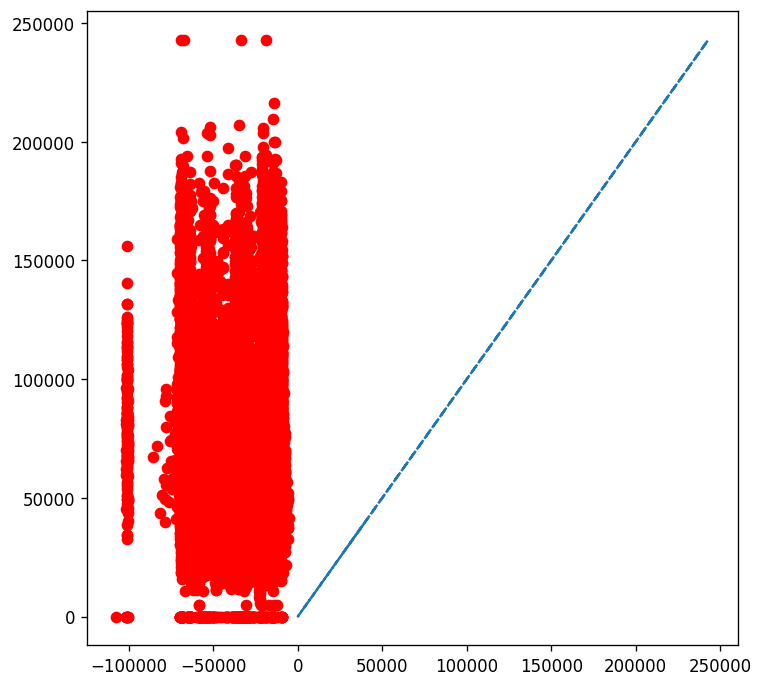

In [49]:
fig, ax = plt.subplots(1,1,figsize=(7,7),dpi=120)

ax.scatter(Y_hat,Y,marker ='o',color='red')
ax.plot(Y,Y,ls='--') # Y, Y es el mejor de los escenarios. Los puntos deberían estar cerca de la recta
plt.show()

¿Mejoró la predicción al introducir un nuevo predictor? En este caso Zip Code? 
En absoluto. El modelo es aún peor. 